# Project 1: "Projectile motion of a baseball under air resistance"
In this project, we study the motion of a baseball under the influence of gravity and air resistance. We shall investigate how the range of a fast-moving baseball is affected by air resistance.

## Section 0. Environment Setup
Here, we install all necessary packages for experiment.

**Package Installation**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Section 1. Problem Investigation
In this section, we will invesigate the motion of the projectile motion step by step.

### **1. Variables and Functions**

We declare necessary function that calculates the motion, and relevants variables.

Variable Declaration

In [2]:
# Gravitational acceleration
g = 9.81
g_vector = [0, 9.81]

Function Declaration

In [3]:
def avoid_division_zero(n):
    if n == 0:
        return 1
    return n

def radius_to_area(r):
    return math.pi * r * r

def diameter_to_area(d):
    return math.pi * d * d / 4

def vector_length(vector):
    return math.sqrt(sum(x**2 for x in vector))

def component_to_vector(x_component, y_component, z_component=None):
    if z_component is not None:
        return [x_component, y_component, z_component]
    return [x_component, y_component]

def vector_to_component(vector):
    n = len(vector)
    if n >= 3:
        return vector[0], vector[1], vector[2]
    else: 
        if n > 1:
            return vector[0], vector[1]
    return vector[0]

def vector_magnitude_decomposition(vector_magnitude, theta):
    x = vector_magnitude * math.cos(math.radians(theta))
    y = vector_magnitude * math.sin(math.radians(theta))
    return x, y

def aerodynamic_drag(air_density, area, drag_coefficient, speed):
    drag_force = 0.5 * air_density * area * drag_coefficient * speed * speed
    return drag_force

### **2. Estimation**
In this section, we will initially estimate the relevant constant for the baseball.

**Alpha Estimation**

We first need to the alpha. Here, we can calculate it by the equation of motion.

In [4]:
def estimate_alpha(a_vector, g_vector, velocity):
    v_x, v_y = vector_to_component(velocity)
    g_x, g_y = vector_to_component(g_vector)
    a_x, a_y = vector_to_component(a_vector)
    alpha_x = - (a_x + g_x) / avoid_division_zero(v_x)
    alpha_y = - (a_y + g_y) / avoid_division_zero(v_y)
    return vector_length(component_to_vector(alpha_x, alpha_y))

v_terminal = [0, 43]
alpha = estimate_alpha([0, 0], [0, -g], v_terminal)
print(f'The alpha is estimated as: {alpha}')

The alpha is estimated as: 0.22813953488372093


**Drag coefficient Estimation**

With alpha, we can further estimate the drag coefficient by the definition of drag force.

In [5]:
def estimate_drag_coefficient(alpha, m, air_density, A):
    return ((2 * m * alpha) / (air_density * A))

m = 0.15
d = 0.074
air_density = 1.2
A = diameter_to_area(d)
drag_coefficient = estimate_drag_coefficient(alpha, m, air_density, A)
print(f'The drag coefficient is estimated as: {drag_coefficient}')

The drag coefficient is estimated as: 13.261334803298055


### **3. Experiment**
In this section, we will perform iteration to find the range by iteration.

##### **3.1 Iteration**

**Projectile Motion Simulation Functions**

In [6]:
def uniform_acceleration_update(a_x, a_y, r_x=0.00, r_y=0.00, v_x=0.00, v_y=0.00):
    return a_x, a_y

def dragged_acceleration_update(a_x, a_y, r_x=0.00, r_y=0.00, v_x=0.00, v_y=0.00):
    v = vector_length(component_to_vector(v_x, v_y))
    a_x = - (alpha * v * v_x)
    a_y = - g - (alpha * v * v_y)
    return a_x, a_y

def calculate_range(r_x_history, r_y_history):
    y_1 = r_y_history[-2]
    y_2 = r_y_history[-1]
    x_1 = r_x_history[-2]
    x_2 = r_x_history[-1]
    x = (-y_1 / (y_2 - y_1)) * (x_2 - x_1) + x_1
    return x

# Projectile Motion
def projectile_motion(r_x, r_y, v_x, v_y, a_x, a_y, time_step, a_update_func=uniform_acceleration_update):
    # Define history to record parameters during iteration
    position_history = []
    r_x_history = []
    r_y_history = []
    velocity_history = []
    v_x_history = []
    v_y_history = []
    acceleration_history = []
    a_x_history = []
    a_y_history = []
    time_history = []
    time_count = 0.00

    # Iteration
    while r_y >= 0:   # Check if the projectile has fallen back to the ground
        # Update positions and velocities
        r_x += v_x * time_step
        r_y += v_y * time_step
        v_x += a_x * time_step
        v_y += a_y * time_step
        a_x, a_y = a_update_func(r_x=r_x,r_y=r_y,v_x=v_x,v_y=v_y,a_x=a_x,a_y=a_y)

        # Record the position, velocity, accelration
        position_history.append(component_to_vector(r_x, r_y))
        r_x_history.append(r_x)
        r_y_history.append(r_y)
        velocity_history.append(component_to_vector(v_x, v_y))
        v_x_history.append(v_x)
        v_y_history.append(v_y)
        acceleration_history.append(component_to_vector(a_x, a_y))
        a_x_history.append(a_x)
        a_y_history.append(a_y)
        time_count += time_step
        time_history.append(time_count)

    return position_history, r_x_history, r_y_history, velocity_history, v_x_history, v_y_history, acceleration_history, a_x_history, a_y_history, time_history

##### **3.2 Experiment on Air Resistance**

In this section, we will compare how air resistance affect the trajectory.

**Experiment without air resistance**

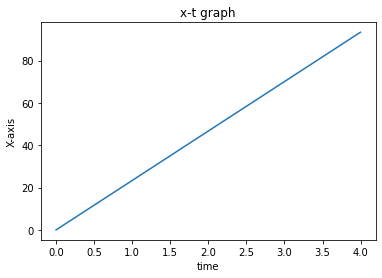

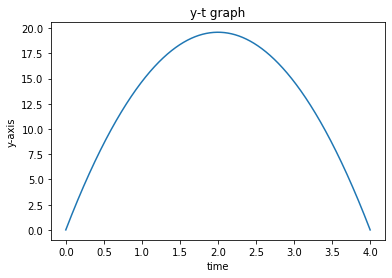

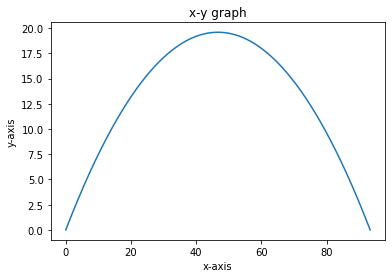

The range of projection R is: 93.38841310193182


In [7]:
# Experiment Parameters
initial_position = 0
initial_velocity = 30.5
initial_acceleration = -g
theta = 40
time_step = 0.0001

# Initial conditions
r_x, r_y = vector_magnitude_decomposition(initial_position, theta)
v_x, v_y = vector_magnitude_decomposition(initial_velocity, theta)
a_x = 0.00
a_y = initial_acceleration

# Perform Iteration
position_history, r_x_history, r_y_history, velocity_history, v_x_history, v_y_history, acceleration_history, a_x_history, a_y_history, time_history = projectile_motion(r_x, r_y, v_x, v_y, a_x, a_y, time_step)

# Plot the x-t graph
plt.plot(time_history, r_x_history)
plt.xlabel('time')
plt.ylabel('X-axis')
plt.title('x-t graph')
plt.savefig(f'x-t graph without air resistance.png')
plt.show()

# Plot the y-t graph
plt.plot(time_history, r_y_history)
plt.xlabel('time')
plt.ylabel('y-axis')
plt.title('y-t graph')
plt.savefig(f'y-t graph without air resistance.png')
plt.show()

# Plot the x-y graph
plt.plot(r_x_history, r_y_history)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('x-y graph')
plt.savefig(f'x-y graph without air resistance.png')
plt.show()

# Find x for y = 0
range_without_air_resistance = calculate_range(r_x_history, r_y_history)
print(f'The range of projection R is: {range_without_air_resistance}')

# Store the result
r_x_history_without_air_resistance = r_x_history
r_y_history_without_air_resistance = r_y_history
range_without_air_resistance = range_without_air_resistance

**Experiment with air resistance**

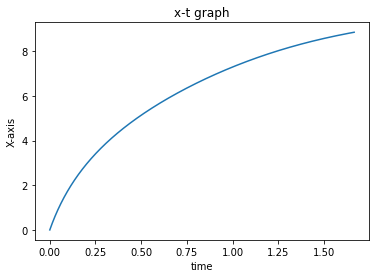

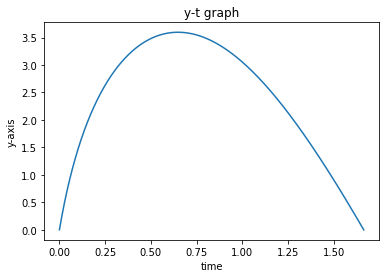

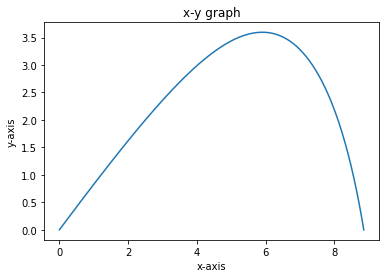

The range of projection R is: 8.852602359551927


<Figure size 432x288 with 0 Axes>

In [8]:
# Experiment Parameters
initial_position = 0
initial_velocity = 30.5
initial_acceleration = -g
theta = 40
time_step = 0.0001

# Initial conditions
r_x, r_y = vector_magnitude_decomposition(initial_position, theta)
v_x, v_y = vector_magnitude_decomposition(initial_velocity, theta)
a_x = 0.00
a_y = initial_acceleration
a_x, a_y = dragged_acceleration_update(r_x=r_x,r_y=r_y,v_x=v_x,v_y=v_y,a_x=a_x,a_y=a_y)

# Perform Iteration
position_history, r_x_history, r_y_history, velocity_history, v_x_history, v_y_history, acceleration_history, a_x_history, a_y_history, time_history = projectile_motion(r_x, r_y, v_x, v_y, a_x, a_y, time_step, dragged_acceleration_update)

# Plot the x-t graph
plt.plot(time_history, r_x_history)
plt.xlabel('time')
plt.ylabel('X-axis')
plt.title('x-t graph')
plt.savefig(f'x-t graph with air resistance.png')
plt.show()

# Plot the y-t graph
plt.plot(time_history, r_y_history)
plt.xlabel('time')
plt.ylabel('y-axis')
plt.title('y-t graph')
plt.savefig(f'y-t graph with air resistance.png')
plt.show()

# Plot the x-y graph
plt.plot(r_x_history, r_y_history)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('x-y graph')
plt.show()
plt.savefig(f'x-y graph with air resistance.png')

# Find x for y = 0
range_with_air_resistance = calculate_range(r_x_history, r_y_history)
print(f'The range of projection R is: {range_with_air_resistance}')

# Store the result
r_x_history_with_air_resistance = r_x_history
r_y_history_with_air_resistance = r_y_history
range_with_air_resistance = range_with_air_resistance

**Result Comparsion**

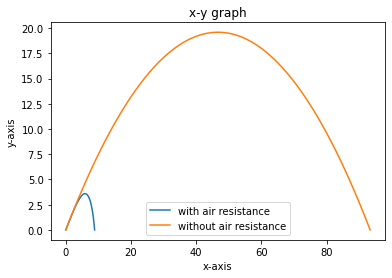

The ratio of R / Rvac is: 0.09479336960024652


<Figure size 432x288 with 0 Axes>

In [9]:
# Plot the trajectories with and without air resistance on the same graph
plt.plot(r_x_history_with_air_resistance, r_y_history_with_air_resistance, label='with air resistance')
plt.plot(r_x_history_without_air_resistance, r_y_history_without_air_resistance, label='without air resistance')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('x-y graph')
plt.legend()
plt.show()
plt.savefig(f'x-y graph air resistance comparsion.png')

# Range Ratio
range_ratio = range_with_air_resistance / range_without_air_resistance
print(f'The ratio of R / Rvac is: {range_ratio}')

##### **3.3 Experiment on Air Resistance upon change of Angle**

In this section, we also invesigate the influence by the air resistance but now compare the initial angle to see how the angle gives the maximum range under air resistance.

!-- Iteration with theta is 20 --
The range of projection R without air resistance is: 60.95629864447507
The range of projection R with air resistance is: 8.812990344189414
The ratio of R / Rvac is: 0.1445788300826924
!-- Iteration with theta is 30 --
The range of projection R without air resistance is: 82.12497896198232
The range of projection R with air resistance is: 9.168620131427643
The ratio of R / Rvac is: 0.11164228286343943
!-- Iteration with theta is 50 --
The range of projection R without air resistance is: 93.38803717541552
The range of projection R with air resistance is: 7.995246341213425
The ratio of R / Rvac is: 0.08561317469597896
!-- Iteration with theta is 60 --
The range of projection R without air resistance is: 82.12386259575426
The range of projection R with air resistance is: 6.6511172632744495
The ratio of R / Rvac is: 0.08098885090212875
!-- Iteration with theta is 70 --
The range of projection R without air resistance is: 60.95447576778469
The range of projec

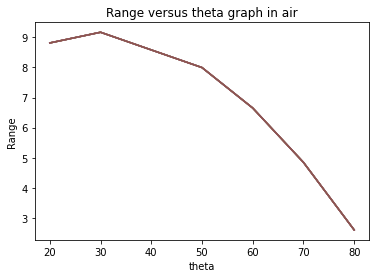

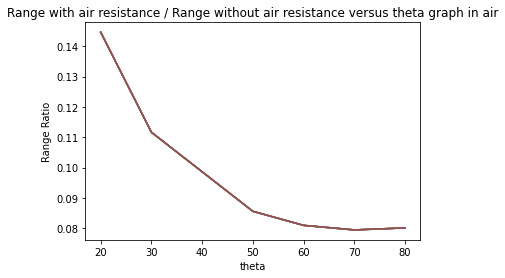

<Figure size 432x288 with 0 Axes>

In [11]:
# Experiment Parameters
initial_position = 0
initial_velocity = 30.5
initial_acceleration = -g
theta_list = [20, 30, 50, 60, 70, 80]
time_step = 0.0001

# Define history to record parameters during iteration
position_history_total_without_air_resistance = []
r_x_history_total_without_air_resistance = []
r_y_history_total_without_air_resistance = []
velocity_history_total_without_air_resistance = []
v_x_history_total_without_air_resistance = []
v_y_history_total_without_air_resistance = []
acceleration_history_total_without_air_resistance = []
a_x_history_total_without_air_resistance = []
a_y_history_total_without_air_resistance = []
time_history_total_without_air_resistance = []
range_history_total_without_air_resistance = []

position_history_total_with_air_resistance = []
r_x_history_total_with_air_resistance = []
r_y_history_total_with_air_resistance = []
velocity_history_total_with_air_resistance = []
v_x_history_total_with_air_resistance = []
v_y_history_total_with_air_resistance = []
acceleration_history_total_with_air_resistance = []
a_x_history_total_with_air_resistance = []
a_y_history_total_with_air_resistance = []
time_history_total_with_air_resistance = []
range_history_total_with_air_resistance = []

range_ratio_history_total = []

# Perform iteration
for i in range(len(theta_list)):
    theta = theta_list[i]
    print(f'!-- Iteration with theta is {theta} --')
    # Initial conditions
    r_x, r_y = vector_magnitude_decomposition(initial_position, theta)
    v_x, v_y = vector_magnitude_decomposition(initial_velocity, theta)
    a_x = 0.00
    a_y = initial_acceleration

    # Perform Iteration without air resistance
    position_history, r_x_history, r_y_history, velocity_history, v_x_history, v_y_history, acceleration_history, a_x_history, a_y_history, time_history = projectile_motion(r_x, r_y, v_x, v_y, a_x, a_y, time_step)

    # Record the history without air resistance
    position_history_total_without_air_resistance.append(position_history)
    r_x_history_total_without_air_resistance.append(r_x_history)
    r_y_history_total_without_air_resistance.append(r_y_history)
    velocity_history_total_without_air_resistance.append(velocity_history)
    v_x_history_total_without_air_resistance.append(v_x_history)
    v_y_history_total_without_air_resistance.append(v_y_history)
    acceleration_history_total_without_air_resistance.append(acceleration_history)
    a_x_history_total_without_air_resistance.append(a_x_history)
    a_y_history_total_without_air_resistance.append(a_y_history)
    time_history_total_without_air_resistance.append(time_history)
    range_without_air_resistance = calculate_range(r_x_history, r_y_history)
    range_history_total_without_air_resistance.append(range_without_air_resistance)

    # Perform Iteration with air resistance
    a_x = 0.00
    a_y = initial_acceleration
    a_x, a_y = dragged_acceleration_update(r_x=r_x,r_y=r_y,v_x=v_x,v_y=v_y,a_x=a_x,a_y=a_y)
    position_history, r_x_history, r_y_history, velocity_history, v_x_history, v_y_history, acceleration_history, a_x_history, a_y_history, time_history = projectile_motion(r_x, r_y, v_x, v_y, a_x, a_y, time_step, dragged_acceleration_update)

    # Record the history with air resistance
    position_history_total_with_air_resistance.append(position_history)
    r_x_history_total_with_air_resistance.append(r_x_history)
    r_y_history_total_with_air_resistance.append(r_y_history)
    velocity_history_total_with_air_resistance.append(velocity_history)
    v_x_history_total_with_air_resistance.append(v_x_history)
    v_y_history_total_with_air_resistance.append(v_y_history)
    acceleration_history_total_with_air_resistance.append(acceleration_history)
    a_x_history_total_with_air_resistance.append(a_x_history)
    a_y_history_total_with_air_resistance.append(a_y_history)
    time_history_total_with_air_resistance.append(time_history)
    range_with_air_resistance = calculate_range(r_x_history, r_y_history)
    range_history_total_with_air_resistance.append(range_with_air_resistance)

    # Record the history with R / Rvac ratio
    range_ratio = range_with_air_resistance / range_without_air_resistance
    range_ratio_history_total.append(range_ratio)

    # Show individual result
    print(f'The range of projection R without air resistance is: {range_without_air_resistance}')
    print(f'The range of projection R with air resistance is: {range_with_air_resistance}')
    print(f'The ratio of R / Rvac is: {range_ratio}')

# Show Experiment Result
print(f'!-- Experiment Result --')

for i in range(len(theta_list)):
    plt.plot(theta_list, range_history_total_with_air_resistance)
plt.xlabel("theta")
plt.ylabel("Range")
plt.title("Range versus theta graph in air")
plt.show()
plt.savefig(f'range versus theta graph in air.png')

for i in range(len(theta_list)):
    plt.plot(theta_list, range_ratio_history_total)
plt.xlabel("theta")
plt.ylabel("Range Ratio")
plt.title("Range with air resistance / Range without air resistance versus theta graph in air")
plt.show()
plt.savefig(f'range ratio versus theta graph.png')

We found that 30 degree gives the maximum range in air. It is also the angle at which the fractional reduction in range due to
air resistance is largest.